In [1]:
import numpy as np
import pandas as pd

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.parquet'
df_premise_code = pd.read_parquet(URL_DATA)
if 'date' in df_premise_code.columns: df_premise_code['date'] = pd.to_datetime(df_premise_code['date'])


URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.parquet'
df_item_code = pd.read_parquet(URL_DATA)
if 'date' in df_item_code.columns: df_item_code['date'] = pd.to_datetime(df_item_code['date'])


In [2]:
import numpy as np
import pandas as pd

#!pip install pandas fastparquet

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/pricecatcher_2023-07.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
df.head()


,date,premise_code,item_code,price
0,2023-07-01,2,1,9.4
1,2023-07-01,2,9,36.0
2,2023-07-01,2,16,6.0
3,2023-07-01,2,18,6.0
4,2023-07-01,2,19,6.0


In [3]:
def merge_data(df):

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning

    print(tempdf.head())
    #
    p =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise_type"])
    p.name = 'premise_type'


    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    q =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise"])
    q.name = 'premise'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    s =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["state"])
    s.name = 'state'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    t = tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')['district'])
    t.name = "district"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    u = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item'])
    u.name = "item"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    v = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['unit'])
    v.name = "unit"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_category'])
    w.name = "item_category"

    #print('S:\n',s) 
    #print('T:\n',t)

    df_master = pd.concat([df,p,q,s,t,u,v,w],axis=1)
    return df_master    

In [4]:

df_master = merge_data(df)    
#df_master.sample(frac=1)
df_master.head()

        date  premise_code  item_code  price
0 2023-07-01             2          1    9.4
1 2023-07-01             2          9   36.0
2 2023-07-01             2         16    6.0
3 2023-07-01             2         18    6.0
4 2023-07-01             2         19    6.0


,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category
0,2023-07-01,2,1,9.4,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM
1,2023-07-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING
2,2023-07-01,2,16,6.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN
3,2023-07-01,2,18,6.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN
4,2023-07-01,2,19,6.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG EMAS,1kg,BUAH-BUAHAN


Crosscheck with DOSM myprice dashboard. The average price by stare for Minyak Masak Tulin Alif 5kg tally for the month of July 2023. But other items such as ayam does not tally. Why?
Further verifications by trying to download data from myprice dashboard failed.

In [5]:
df_by_item_state = df_master.groupby(['item_code','item','unit','state']).price.agg(['max','min','mean'])

df_by_item_state.query('item_code ==1')



max    min  \
item_code item                   unit state                            
1         AYAM BERSIH - STANDARD 1kg  Johor               9.4   6.39   
                                      Kedah               9.9   4.99   
                                      Kelantan            9.4   6.39   
                                      Melaka              9.4   6.30   
                                      Negeri Sembilan     9.4   6.90   
                                      Pahang              9.4   6.99   
                                      Perak               9.9   6.29   
                                      Perlis              9.4   6.99   
                                      Pulau Pinang        9.4   6.69   
                                      Sabah              11.3  11.29   
                                      Sarawak            11.4   9.79   
                                      Selangor            9.4   6.79   
                                      Terengganu          9.4   6.90   
                                      W.P. Kuala Lumpur   9.4   6.90   
                                      W.P. Labuan        11.3  11.30   
                                      W.P. Putrajaya      9.4   6.99   

                                                              mean  
item_code item                   unit state                         
1         AYAM BERSIH - STANDARD 1kg  Johor               8.917112  
                                      Kedah               9.086602  
                                      Kelantan            9.004056  
                                      Melaka              8.904078  
                                      Negeri Sembilan     8.941674  
                                      Pahang              9.004149  
                                      Perak               8.997840  
                                      Perlis              8.923564  
                                      Pulau Pinang        9.110068  
                                      Sabah              11.298160  
                                      Sarawak            10.278951  
                                      Selangor            9.011825  
                                      Terengganu          9.138045  
                                      W.P. Kuala Lumpur   9.012552  
                                      W.P. Labuan        11.300000  
                                      W.P. Putrajaya      8.915372

There are 51 data points in main df for July23-Johor-Ayam standard 1kg.By comparison , the excel downloaded from DOSM 'JADUAL' only shows 9 data points. DOSM dashboard also indicates mean 9.30, min 7.59, max 12

In [6]:
df_master.query('state=="Johor" and item_code==1')["price"].nunique()
x = df_master.query('state=="Johor" and item_code==1')
#x[x["date"]=='2023-07-12'].to_csv('12july23johorayam.csv')

In [7]:
x[x["date"]=='2023-07-12']["price"].max()

9.4

# Malaysia view

Regardless of the discrepancies between this data and DOSM, we assume this data is correct because at least minyak masak 5kg alif tally. We think that DOSM disrepancies maybe due to averaging methods by DOSM (average day-by borong, runcit, fama-then by month, etc)

Data count for each item is included to show 'significance level' of the item. If it's uninmportant, DOSM wouldn't record it much.

In [8]:
#df_msia = df.groupby(['item_code']).price.agg(['max','min','mean'])
df_msia = df_master.groupby(['item_code','item','unit']).price.agg(['max','min','mean','count'])


df_msia.head()

,,,max,min,mean,count
item_code,item,unit,,,,
1,AYAM BERSIH - STANDARD,1kg,11.4,4.99,9.057822,19876
2,AYAM BERSIH - SUPER,1kg,12.3,7.99,11.078288,4516
3,AYAM HIDUP,1kg,10.5,6.40,9.229885,87
9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (AUSTRALIA - KOTAK),1kg,59.9,20.00,32.425818,3527
10,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (NEW ZEALAND - KOTAK),1kg,60.0,26.50,34.362603,242


1940172

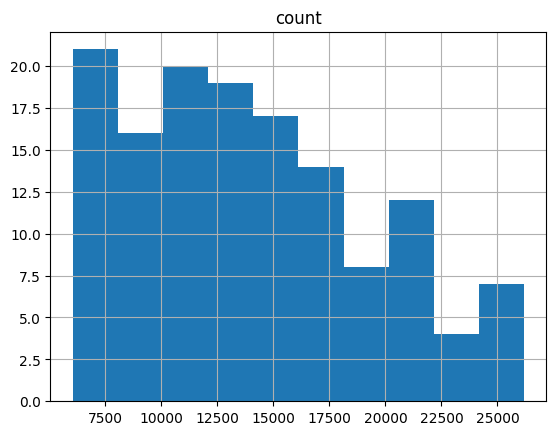

In [9]:
df_msia = df_msia.sort_values('count',ascending=False)
#df_msia.hist('count')
df_msia[df_msia['count']>6000].hist('count')
df_msia[df_msia['count']>6000]['count'].sum()


#df_msia[df_msia['count']>100 & df_msia['count']<1000 ]
#df2 = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
#df2.plot.bar(x='lab',y='val')
#df2.head()


# East vs Semenanjung Malaysia

East Msia-Sbah,Swak,Labuan

In [10]:
df_east = df_master.query('state==["Sarawak","Sabah","W.P. Labuan"]')
#df_east.to_csv('eastmsia.csv')
df_east_summary = df_east.groupby(['item_code','item']).price.agg(['max','min','mean'])


df_east_summary = df_east_summary.rename(columns={'max':'max_east','min':'min_east','mean':'mean_east'})
df_east_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 475 entries, (1, 'AYAM BERSIH - STANDARD') to (2020, 'YOGURT LACTEL (FAT FREE) (STRAWBERRY)')
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   max_east   475 non-null    float64
 1   min_east   475 non-null    float64
 2   mean_east  475 non-null    float64
dtypes: float64(3)
memory usage: 20.2+ KB


In [11]:
df_east_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 475 entries, (1, 'AYAM BERSIH - STANDARD') to (2020, 'YOGURT LACTEL (FAT FREE) (STRAWBERRY)')
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   max_east   475 non-null    float64
 1   min_east   475 non-null    float64
 2   mean_east  475 non-null    float64
dtypes: float64(3)
memory usage: 20.2+ KB


Semenanjung

In [12]:
df_semenanjung = df_master.query('state!=["Sarawak","Sabah","W.P. Labuan"]')
#df_semenanjung.to_csv('semenanjungmsia.csv')
df_semenanjung_summary = df_semenanjung.groupby(['item_code','item']).price.agg(['max','min','mean'])
#df_semenanjung.to_csv('semenanjungmsia.csv')


In [13]:
df_semenanjung_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 477 entries, (1, 'AYAM BERSIH - STANDARD') to (2020, 'YOGURT LACTEL (FAT FREE) (STRAWBERRY)')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   max     477 non-null    float64
 1   min     477 non-null    float64
 2   mean    477 non-null    float64
dtypes: float64(3)
memory usage: 20.3+ KB


Semenanjung Malaysia summary of prices (max,min,mean)

In [14]:
df_semenanjung_summary.head()

,,max,min,mean
item_code,item,,,
1,AYAM BERSIH - STANDARD,9.90,4.99,9.012636
2,AYAM BERSIH - SUPER,10.89,8.50,10.326075
3,AYAM HIDUP,10.50,6.40,9.229885
9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (AUSTRALIA - KOTAK),59.90,20.00,31.788445
10,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (NEW ZEALAND - KOTAK),60.00,26.50,34.352059


Merge East Msia and Semenanjung.East Msia has 475 entries, Semenanjung has 477. Intersection has 451 entries.

In [15]:
df_east_semenanjung = pd.merge(df_semenanjung_summary,df_east_summary,how='inner',on=['item_code','item'])
df_east_semenanjung.info()
df_east_semenanjung.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 451 entries, (1, 'AYAM BERSIH - STANDARD') to (2020, 'YOGURT LACTEL (FAT FREE) (STRAWBERRY)')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   max        451 non-null    float64
 1   min        451 non-null    float64
 2   mean       451 non-null    float64
 3   max_east   451 non-null    float64
 4   min_east   451 non-null    float64
 5   mean_east  451 non-null    float64
dtypes: float64(6)
memory usage: 62.1+ KB


,,max,min,mean,max_east,min_east,mean_east
item_code,item,,,,,,
1,AYAM BERSIH - STANDARD,9.90,4.99,9.012636,11.40,9.79,10.766777
2,AYAM BERSIH - SUPER,10.89,8.50,10.326075,12.30,7.99,11.401754
9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (AUSTRALIA - KOTAK),59.90,20.00,31.788445,48.90,23.90,35.528902
10,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (NEW ZEALAND - KOTAK),60.00,26.50,34.352059,34.99,34.99,34.990000
11,DAGING KAMBING BEBIRI IMPORT TANPA TULANG (MUTTON) (TIDAK TERMASUK PAHA - AUSTRALIA),60.00,25.00,47.924184,32.99,32.99,32.990000


Compare East Msia vs Semenanjung. 

<Axes: >

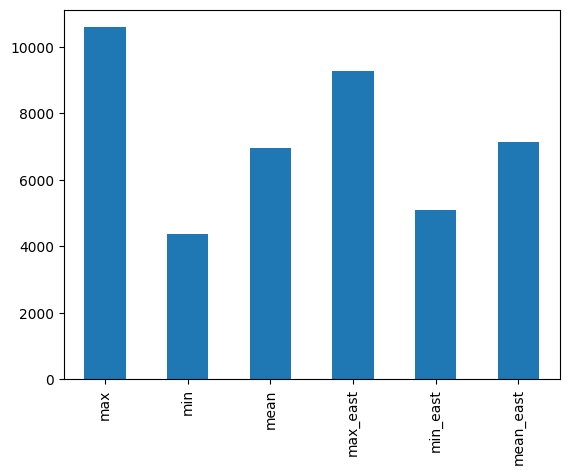

In [16]:
df_east_semenanjung.sum().plot.bar()

In [20]:
x = df_east_semenanjung.sum()
x.head()
#x['max']

max         10589.280000
min          4358.550000
mean         6964.814581
max_east     9270.570000
min_east     5091.460000
dtype: float64

<Axes: >

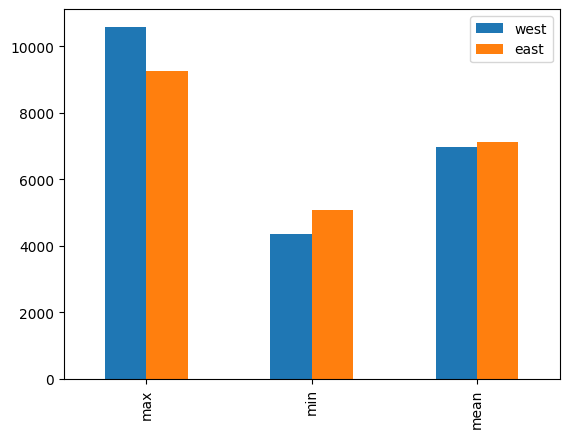

In [25]:
west = [x['max'],x['min'],x['mean']]
east = [x['max_east'],x['min_east'],x['mean_east']]

index = ['max','min','mean']

df = pd.DataFrame({'west':west,'east':east},index = index)


df.plot.bar()